In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

Import training data from file:

In [34]:
with open('trainingset.csv', 'r') as csvfile:
    df = pd.read_csv(csvfile, dtype={'booking_bool':bool,'srch_destination_id':np.int32, 
                                     'site_id':np.int32, 'visitor_location_country_id':np.int32,
                                     'visitor_hist_starrating':np.float, 'visitor_hist_adr_usd':np.float,
                                     'prop_country_id':np.int32, 'prop_id':np.int32, 
                                     'prop_starrating':np.int32, 'prop_review_score':np.float,
                                     'prop_brand_bool':bool, 'prop_location_score1':np.float,
                                     'prop_location_score2':np.float, 'prop_log_historical_price':np.float,
                                     'price_usd':np.float, 'promotion_flag':bool,\
                                     'srch_length_of_stay':np.int32, 'srch_booking_window':np.int32,
                                     'srch_adults_count':np.int32, 'srch_children_count':np.int32,
                                     'srch_room_count':np.int32, 'srch_saturday_night_bool':bool,
                                     'srch_query_affinity_score':np.float, 'orig_destination_distance':np.float,
                                     'random_bool':bool, 'position':np.int32, 'click_bool':bool,
                                     'booking_bool':bool, 'gross_booking_usd':np.float})


Number of unique stuff:

In [35]:
print("Number of unique searches:"),len(df.srch_id.unique())
print("Number of countries:"),len(df.prop_country_id.unique())
print("Number of hotels:"),len(df.prop_id.unique())

Number of unique searches: 199795
Number of countries: 172
Number of hotels: 129113


Difference in price between client history and current price for booked/clicked/none

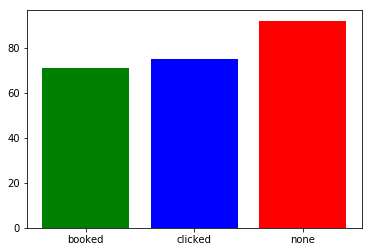

In [36]:
df['usd_diff'] = abs(df.price_usd - df.visitor_hist_adr_usd)

diffUsd_click = np.array(df.usd_diff.loc[df['click_bool']==True])
diffUsd_click = diffUsd_click[~np.isnan(diffUsd_click)]
mean_click = np.mean(diffUsd_click)

diffUsd_book = np.array(df.usd_diff.loc[df['booking_bool']==True])
diffUsd_book = diffUsd_book[~np.isnan(diffUsd_book)]
mean_book = np.mean(diffUsd_book)

diffUsd_none = np.array(df.usd_diff.loc[(df['click_bool']==False) & df['booking_bool']==False])
diffUsd_none = diffUsd_none[~np.isnan(diffUsd_none)]
mean_none = np.mean(diffUsd_none)

np_means = np.array([mean_book,mean_click,mean_none])
keys = ['booked','clicked','none']

plt.bar(range(len(np_means)), np_means, align='center',color = ['green','blue','red'])
plt.xticks(range(len(np_means)), keys)

plt.show()
        

Difference in rating between client history and prop rating for booked/clicked/none

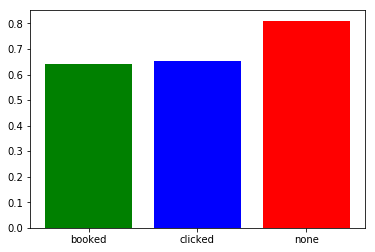

In [37]:
df['star_diff'] = abs(df.prop_starrating - df.visitor_hist_starrating) 

diffStar_click = np.array(df.star_diff.loc[df['click_bool']==True])
diffStar_click = diffStar_click[~np.isnan(diffStar_click)]
mean_click = np.mean(diffStar_click)

diffStar_book = np.array(df.star_diff.loc[df['booking_bool']==True])
diffStar_book = diffStar_book[~np.isnan(diffStar_book)]
mean_book = np.mean(diffStar_book)

diffStar_none = np.array(df.star_diff.loc[(df['click_bool']==False) & df['booking_bool']==False])
diffStar_none = diffStar_none[~np.isnan(diffStar_none)]
mean_none = np.mean(diffStar_none)

np_means = np.array([mean_book,mean_click,mean_none])
keys = ['booked','clicked','none']

plt.bar(range(len(np_means)), np_means, align='center',color = ['green','blue','red'])
plt.xticks(range(len(np_means)), keys)

plt.show()
        

See if promotion flag influences click/book:

In [38]:
totalClick = len(df.loc[df['click_bool']==True])
promClick = len(df.loc[(df['click_bool']==True) & (df['promotion_flag'] == True)])
print ("Total nr clicks/Promotion flag clicks"), totalClick, promClick

totalBook = len(df.loc[df['booking_bool']==True])
promBook = len(df.loc[(df['booking_bool']==True) & (df['promotion_flag'] == True)])
print ("Total nr bookings/Promotion flag bookings"), totalBook, promBook

totalProm = len(df.loc[df['promotion_flag']==True])
print ("Number of promotion flags:"), totalProm

Total nr clicks/Promotion flag clicks 221879 64469
Total nr bookings/Promotion flag bookings 138390 41947
Number of promotion flags: 1069118
